In [155]:
import rasterio     # import the main rasterio function
import matplotlib   # matplotlib is the primary python plotting and viz library
# this bit of magic allows matplotlib to plot inline in a jupyter notebook
%matplotlib inline  

# We can check which version we're running by printing the "__version__" variable
print("rasterio's version is: " + rasterio.__version__)
print(rasterio)

rasterio's version is: 1.3.9
<module 'rasterio' from '/opt/homebrew/Caskroom/miniconda/base/envs/ED/lib/python3.8/site-packages/rasterio/__init__.py'>


IMAGE 

(LC09)

In [156]:
# filepath to our image
img_fp = "Nagasaki_CROPPED_STACKED.tif"

# Open a geospatial dataset
dataset = rasterio.open(img_fp)
print(dataset)

<open DatasetReader name='Nagasaki_CROPPED_STACKED.tif' mode='r'>


In [157]:
# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Does the raster have a description or metadata?
desc = dataset.descriptions
metadata = dataset.meta

print('Raster description: {desc}\n'.format(desc=desc))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

print('All raster metadata:')
print(metadata)
print('\n')

Image filename: Nagasaki_CROPPED_STACKED.tif

Number of bands in image: 8

Image size is: 2334 rows x 2868 columns

Raster description: (None, None, None, None, None, None, None, None)

Raster driver: GTiff

Image projection:
PROJCS["WGS 84 / UTM zone 52N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",129],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]] 

Image geo-transform:
| 30.00, 0.00, 548985.00|
| 0.00,-30.00, 3669015.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 2868, 'height': 2334, 'count': 8, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 52N",GEOGCS["WGS 84",

ERROR 1: PROJ: internal_proj_identify: /opt/homebrew/Caskroom/miniconda/base/envs/ED/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /opt/homebrew/Caskroom/miniconda/base/envs/ED/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [158]:
full_img = dataset.read()
full_img.shape # bands, rows, cols

(8, 2334, 2868)

REAL COLORS

(we can see that it s dark -> night ?)

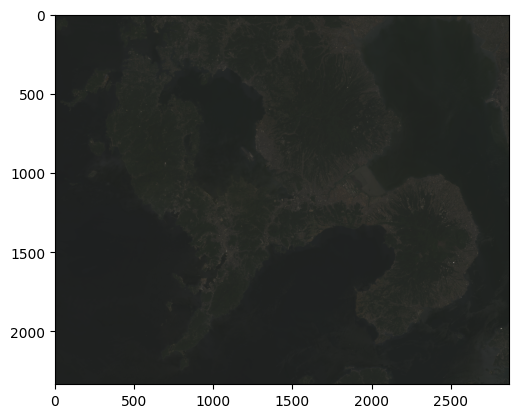

<Axes: >

In [218]:
from rasterio.plot import show
from rasterio.plot import adjust_band

norm_img = adjust_band(full_img)

show(norm_img[[3,2,1], :, :])

In [232]:
norm_img[[3,2,1], :, :].shape

full_img§

(3, 2334, 2868)

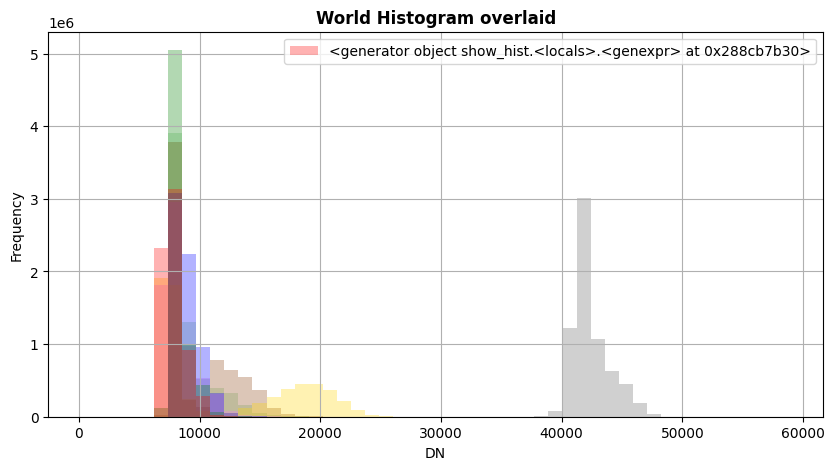

In [211]:
from rasterio.plot import show_hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
show_hist(dataset, ax=ax, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")

bande 01 : aerosol 
bande 02 : blue 
        3 ; green 
        4 : red
        5 : nir 
        6 : swir1
        7 : swir2
        8 : panchromatic
        9 : cirrus

<Axes: title={'center': 'blue channel'}>

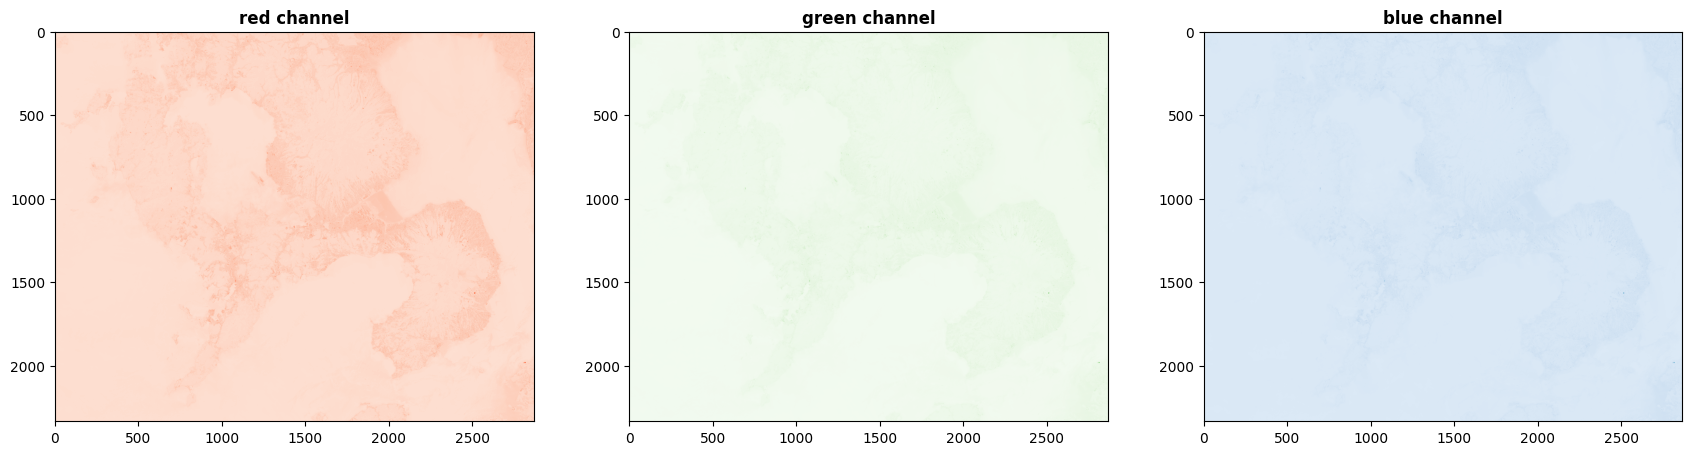

In [216]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show(full_img[3], ax=axr, cmap='Reds', title='red channel')
show(full_img[2], ax=axg, cmap='Greens', title='green channel')
show(full_img[1], ax=axb, cmap='Blues', title='blue channel')

NIR

In [219]:
import numpy as np

# Open the fourth band in our image - NIR here
nir = dataset.read(4)
nir.shape # check out the dimensions of the image

# What are the band's datatypes?
datatype = dataset.dtypes
print('Band datatypes: {dt}'.format(dt=datatype))

# How about some band statistics?
band_mean = np.mean(nir)
band_min = np.amin(nir)
band_max = np.amax(nir)
band_stddev = np.std(nir)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band datatypes: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
Band range: 0 - 55832
Band mean, stddev: 8343.687408797725, 1317.2179715911643



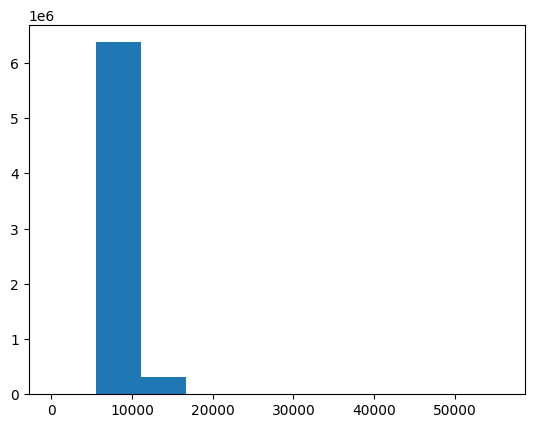

In [220]:
plt.hist(nir.flatten());


RED

In [163]:
import numpy as np

# Open the fourth band in our image - NIR here
red = dataset.read(3)
red.shape # check out the dimensions of the image

# What are the band's datatypes?
datatype = dataset.dtypes
print('Band datatypes: {dt}'.format(dt=datatype))

# How about some band statistics?
band_mean = np.mean(red)
band_min = np.amin(red)
band_max = np.amax(red)
band_stddev = np.std(red)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band datatypes: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
Band range: 5918 - 55949
Band mean, stddev: 8901.39192537936, 1143.4609515680595



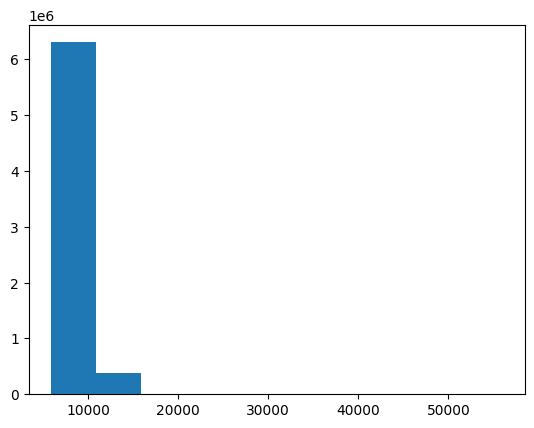

In [164]:
plt.hist(red.flatten());

In [221]:
# for i in range(0,8):
#     print(i)
#     plt.hist(full_img[i].flatten());
#     plt.show()

NDVI

Show vegetation


Max NDVI: 1.0
Mean NDVI: 0.1269150104653152
Median NDVI: 0.01129032258064517
Min NDVI: -1.0


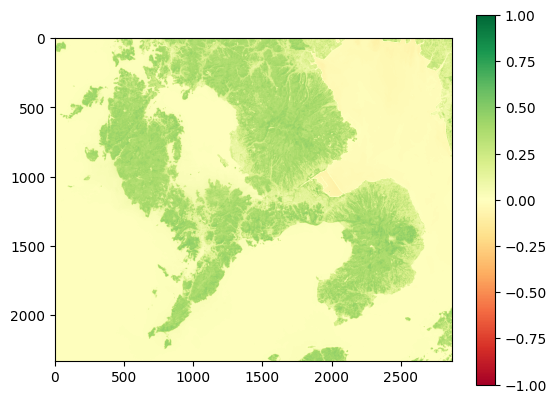

In [228]:
np.seterr(divide='ignore', invalid='ignore')

norm_img = adjust_band(full_img)

bandNIR = norm_img[4] # fourth band
bandRed = norm_img[3] # second band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

import matplotlib.pyplot as plt
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

Array shape before: (2334, 2868) (size is 6693912)
Array shape after: (6693912,) (size is 6693912)


Text(0.5, 1.0, 'Tasseled Cap, eh?')

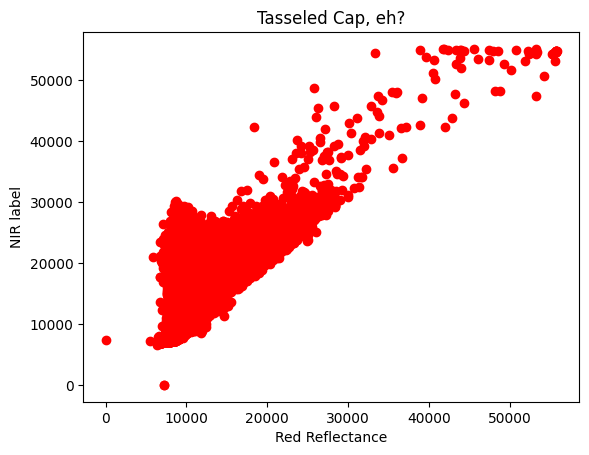

In [84]:
# red = full_img[3, :, :]
# nir = full_img[4, :, :]

# print('Array shape before: {shp} (size is {sz})'.format(shp=red.shape, sz=red.size))

# red_flat = np.ndarray.flatten(red)
# nir_flat = np.ndarray.flatten(nir)

# print('Array shape after: {shp} (size is {sz})'.format(shp=red_flat.shape, sz=red_flat.size))

# fig, ax = plt.subplots()

# # Make the plot
# ax.scatter(red_flat, nir_flat, color='r', marker='o')

# # Add some axis labels
# ax.set_xlabel('Red Reflectance')
# ax.set_ylabel('NIR label')

# # Add a title
# ax.set_title('Tasseled Cap, eh?')

(3, 2334, 2868)
(2334, 2868, 3)


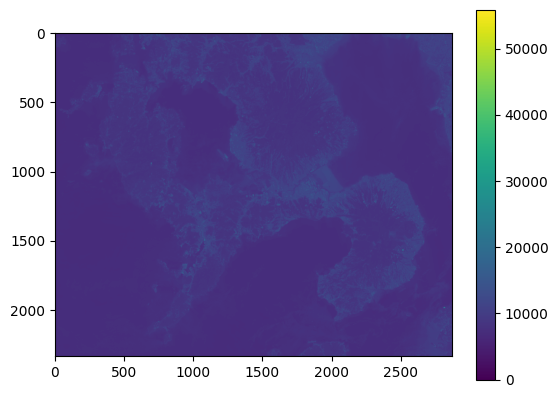

In [132]:
image = full_img

# use "imshow" for an image -- nir at first
fig, ax = plt.subplots()
img = ax.imshow(image[3, :, :])
fig.colorbar(img, ax=ax); # we have to pass the current plot as an argument thus have to set it as a variable

from rasterio.plot import reshape_as_raster, reshape_as_image

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[index, :, :].astype(np.float64)

max_val = 50000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[0]):
    colors[b, :, :] = colors[b, :, :] * 1 / (max_val - min_val)

# rasters are in the format [bands, rows, cols] whereas images are typically [rows, cols, bands]
# and so our array needs to be reshaped
print(colors.shape)
colors_reshaped = reshape_as_image(colors)
print(colors_reshaped.shape)


In [ ]:
np.seterr(divide='ignore', invalid='ignore')
bandNIR = image[3, :, :]
bandRed = image[2, :, :]

ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

Text(0.5, 1.0, 'NDVI')

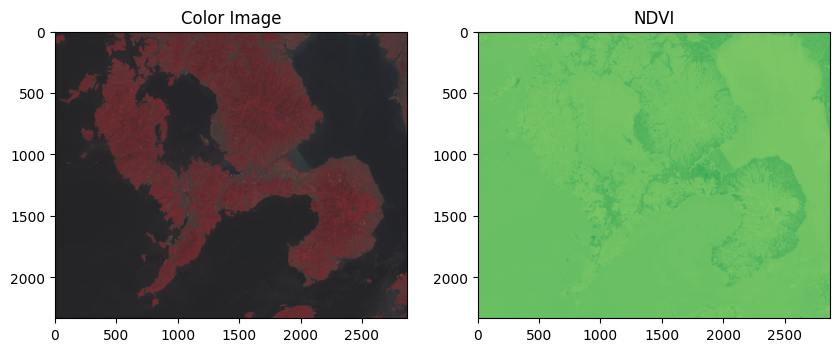

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 

# Show the color image
axs[0].imshow(colors_reshaped)
axs[0].set_title('Color Image')

# Show NDVI
axs[1].imshow(ndvi, cmap='RdYlGn')
axs[1].set_title('NDVI')

Text(0.5, 1.0, 'RGB in matplotlib imshow')

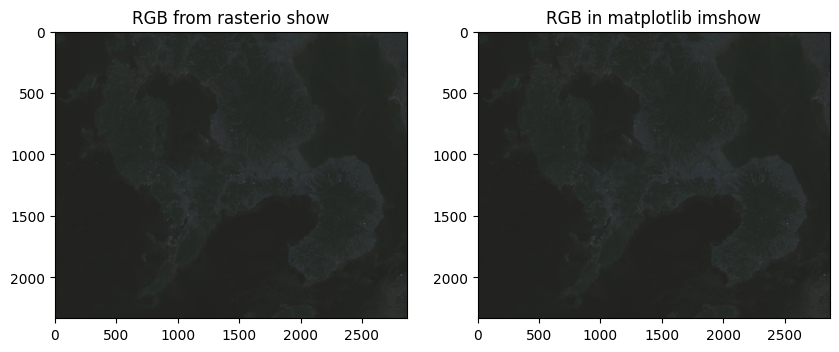

In [230]:
from rasterio.plot import adjust_band

rgb = image[1:4] # read in red, green, blue
rgb_norm = adjust_band(rgb) # normalize bands to range between 1.0 to 0.0
rgb_reshaped = reshape_as_image(rgb_norm) # reshape to [rows, cols, bands]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# the rasterio show function takes in [bands, rows, cols] so we don't need to reshape
show(rgb_norm, ax=axs[0])
axs[0].set_title("RGB from rasterio show")

# plot with normal matplotlib functions
axs[1].imshow(rgb_reshaped)
axs[1].set_title("RGB in matplotlib imshow")